# Classification System Metrics

Wayne Huynh

There are 20 binary observations whose target values are:

$$[1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1]$$

Suppose that the machine learning model returns prediction probabilities 

$$[0.886, 0.375, 0.174, 0.817, 0.574, 0.319, 0.812, 0.314, 0.098, 0.741, 0.847, 0.202, 0.31 , 0.073, 0.179, 0.917, 0.64 , 0.388, 0.116, 0.72]$$

# Calculate Model Predictions

In [1]:
# Create a predict function
def predict(prediction_probabilities, threshold):
    predictions = []
    for probability in prediction_probabilities:
        if probability <= threshold:
            predictions.append(0)
        else:
            predictions.append(1)
    # Return final predictions as a list
    return predictions

Create a list of prediction probabilities.

Use the `predict()` function to calculate the model predictions using those variables

In [2]:
# prediction probabilities
probs = [0.886,0.375,0.174,0.817,0.574,0.319,0.812,0.314,0.098,0.741,
         0.847,0.202,0.31,0.073,0.179,0.917,0.64,0.388,0.116,0.72]

# threshold value
thresh = 0.5

# prediction values
preds = predict(probs, thresh)

print("Model Predictions: ", preds)

Model Predictions:  [1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1]


# Calculate the Model Accuracy

In [3]:
# Create acc_score function
def acc_score(true_labels, model_predictions):
    if len(true_labels) != len(model_predictions):
        raise ValueError("The length of true_labels and predictions must be the same.")
    
    correct_predictions = 0
    total_predictions = len(true_labels)
    
    for i in range(total_predictions):
        if true_labels[i] == model_predictions[i]:
            correct_predictions += 1
    
    # Calculate model accuracy score
    accuracy = correct_predictions / total_predictions
    return accuracy

# Calculate the Accuracy Score

In [4]:
# true labels
labels = [1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1]

# Compute accuracy score using the acc_score() function
accuracy = acc_score(labels, preds)
print("Model Accuracy: ", accuracy)

Model Accuracy:  0.85


Use the `accuracy_score()` function to check that the `acc_score` value.

In [5]:
from sklearn.metrics import accuracy_score

# Use the accuracy_score() function to check acc_score()
sklearn_accuracy = accuracy_score(labels, preds)
sklearn_accuracy

0.85

# Calculate the Model Error Rate

In [6]:
# Create error_rate() function
def error_rate(true_labels, model_predictions):
    #Calculate model error rate
    accuracy = acc_score(true_labels, model_predictions)
    model_error_rate = 1 - accuracy
    return model_error_rate

Calculate the model error rate for the true labels and the model predictions.

In [7]:
# Call the error_rate function 
error = error_rate(labels, preds)
print("Model Error Rate: ", error)

Model Error Rate:  0.15000000000000002


# Calculate the Model Precision and Recall

In [1]:
# Create prec_recall_score() function
def prec_recall_score(true_labels, model_predictions):
    true_positives = 0
    true_negatives = 0
    false_positives = 0
    false_negatives = 0
    
    for i in range(len(true_labels)):
        true_label = true_labels[i]
        prediction = model_predictions[i]
        
        if true_label == 1 and prediction == 1:
            true_positives += 1
        elif true_label == 0 and prediction == 1:
            false_positives += 1
        elif true_label == 1 and prediction == 0:
            false_negatives += 1
    
    # Compute model precision and recall
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) != 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) != 0 else 0
    
    # Return model precision and recall
    return precision, recall

Use the `prec_recall_score` function to compute __precision__ and __recall__ for the true labels and the model predictions.

In [9]:
# Call the prec_recall_score to compute precision and recall
precision, recall = prec_recall_score(labels, preds)
print("Precision = ", precision)
print("Recall = ", recall)

Precision =  0.7777777777777778
Recall =  0.875


Use `precision_score()` and `recall_score()` functions to verify that calculations.

In [10]:
from sklearn.metrics import precision_score
# Sklearn Precision Score
sklearn_precision = precision_score(labels, preds)
sklearn_precision

0.7777777777777778

In [11]:
from sklearn.metrics import recall_score
# Sklearn Recall Score
sklearn_recall = recall_score(labels, preds)
sklearn_recall

0.875

# Calculate $F_\beta$ Scores
where $ F_\beta = \frac{(\beta^2+1) \cdot Pr \cdot Re}{\beta^2 \cdot Pr + Re} $

In [12]:
# Create f_beta function
def f_beta(true_labels, model_predictions, beta):
    # Invoke prec_recall_score to obtain values for precision and recall
    precision, recall = prec_recall_score(true_labels, model_predictions)
    
    if beta == 0 or precision == 0:
        return 0
    
    # Calculate f_beta with given formula
    f_beta = (((beta**2) + 1) * precision * recall) / ((beta**2 * precision) + recall)
    return f_beta

Use `f_beta` function to compute the $F_1$ score for the true labels and the model predictions.

In [13]:
# Call the f_beta function to compute F1 score
F1 = f_beta(labels, preds, beta=1)
print("F1 = ", F1)

F1 =  0.823529411764706


Verify the calculation is correct by using the `f1_score` function.

In [14]:
from sklearn.metrics import f1_score

# Use f1_score to check f1
sklearn_f1 = f1_score(labels, preds)
sklearn_f1

0.823529411764706

# Calculate the True Positive Rate and False Positive Rate for ROC Curve

where 

$ TPR = recall = \frac{TP}{TP + FN} $

and 

$ FPR = \frac{FP}{FP + TN} $

In [15]:
# Create TPR_FPR_score function
def TPR_FPR_score(true_labels, model_predictions):
    true_positives = 0
    false_positives = 0
    true_negatives = 0
    false_negatives = 0
    
    for i in range(len(true_labels)):
        true_label = true_labels[i]
        prediction = model_predictions[i]
        
        if true_label == 1 and prediction == 1:
            true_positives += 1
        elif true_label == 0 and prediction == 1:
            false_positives += 1
        elif true_label == 0 and prediction == 0:
            true_negatives += 1
        elif true_label == 1 and prediction == 0:
            false_negatives += 1
    
    # Calculate tpr with given formula
    tpr = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) != 0 else 0
    # Calculate fpr with given formula
    fpr = false_positives / (false_positives + true_negatives) if (false_positives + true_negatives) != 0 else 0
    
    return tpr, fpr

Invoke the `TPR_FPR_score` function.

In [16]:
# Call the TPR_FPR_score function
tpr, fpr = TPR_FPR_score(labels, preds)
tpr, fpr

(0.875, 0.16666666666666666)

# Compute and Plot the ROC Curve

In [17]:
# Create roc_curve_computer function
def roc_curve_computer(true_labels, prediction_probabilities, thresholds):
    tpr_list = []
    fpr_list = []
    
    for threshold in thresholds:
        predictions = predict(prediction_probabilities, threshold)
        tpr, fpr = TPR_FPR_score(true_labels, predictions)
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    
    # Return TPR values and FPR values
    return tpr_list, fpr_list

Use the `roc_curve_computer` function along with the threshold values to compute the TPR and FPR lists.

In [19]:
thresholds = [x/100 for x in range(101)]

# Call the roc_curve_computer function
TPR, FPR = roc_curve_computer(labels, probs, thresholds)
TPR, FPR

([1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.875,
  0.875,
  0.875,
  0.875,
  0.875,
  0.875,
  0.875,
  0.875,
  0.875,
  0.875,
  0.875,
  0.875,
  0.875,
  0.875,
  0.875,
  0.875,
  0.875,
  0.875,
  0.875,
  0.875,
  0.875,
  0.875,
  0.875,
  0.875,
  0.875,
  0.875,
  0.875,
  0.875,
  0.875,
  0.875,
  0.875,
  0.875,
  0.875,
  0.75,
  0.75,
  0.75,
  0.625,
  0.625,
  0.625,
  0.625,
  0.625,
  0.625,
  0.625,
  0.375,
  0.375,
  0.375,
  0.25,
  0.25,
  0.25,
  0.25,
  0.125,
  0.125,
  0.125,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.9166666666666666,
  0.9166666666666666,
  0.8333333333333334,
  0.8333333333333334,
  0.75,
  0.75,
  0.75,
  0.75,
  0.75,
  0.75,
 

# Create a Plotting Function to make the ROC curve.

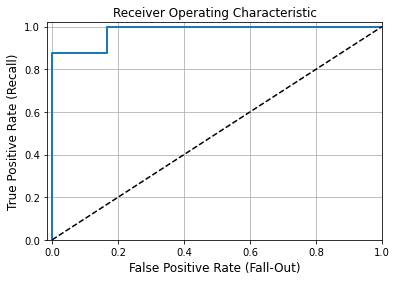

In [20]:
import matplotlib.pyplot as plt

def plot_roc_curve(tpr, fpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal line
    plt.title('Receiver Operating Characteristic', fontsize=12)
    plt.axis([-0.015, 1.0, 0, 1.02])
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=12)
    plt.ylabel('True Positive Rate (Recall)', fontsize=12)
    plt.grid(True)

# Plot the ROC curve
plt.figure(figsize=(6, 4))
plot_roc_curve(TPR, FPR)
plt.show()

Compare the created plot to the plot generated by Scikit-Learn's `roc_curve` function.

In [21]:
from sklearn.metrics import roc_curve
# Call the roc_curve function to check previous plot
fpr, tpr, thresholds = roc_curve(labels, probs)
fpr, tpr, thresholds

(array([0.        , 0.        , 0.        , 0.16666667, 0.16666667,
        1.        ]),
 array([0.   , 0.125, 0.875, 0.875, 1.   , 1.   ]),
 array([1.917, 0.917, 0.72 , 0.574, 0.388, 0.073]))

Pass the false positive rates and the true positive rates as input to the created `plot_roc_curve` function in order to compare ROC curves.

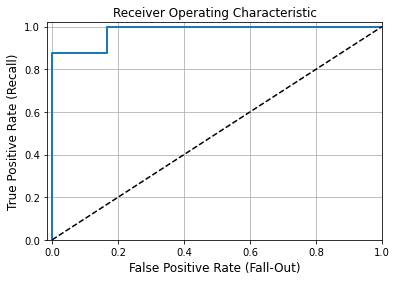

In [22]:
# Plot the new ROC curve
plt.figure(figsize=(6, 4))
plot_roc_curve(tpr, fpr)
plt.show()